<a href="https://colab.research.google.com/github/rzunick/MNA-Navegacion-Autonoma-Equipo-14/blob/main/4_1_Clasificacion_de_Peatones_Keras_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

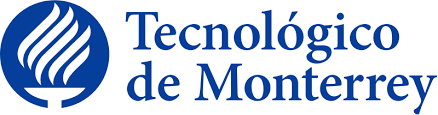

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
## Profesor: David Antonio Torres
## Actividad 4.1 - Ejercicio de clasificación con Keras
## **Equipo 14**: 
### - *Alejandro Juárez Corona-A01168444*
### - *Juan Carlos Lopez Cruz- A01793052*
### - *Ronald David Zúniga Sánchez-A01686240*
### - *Rodrigo López Aguilera-A01793071*

### **El modelo de redes neuronales**

Las redes neuronales son modelos simples del funcionamiento del sistema nervioso. Las unidades básicas son las neuronas, que generalmente se organizan en capas, como se muestra en la siguiente ilustración.

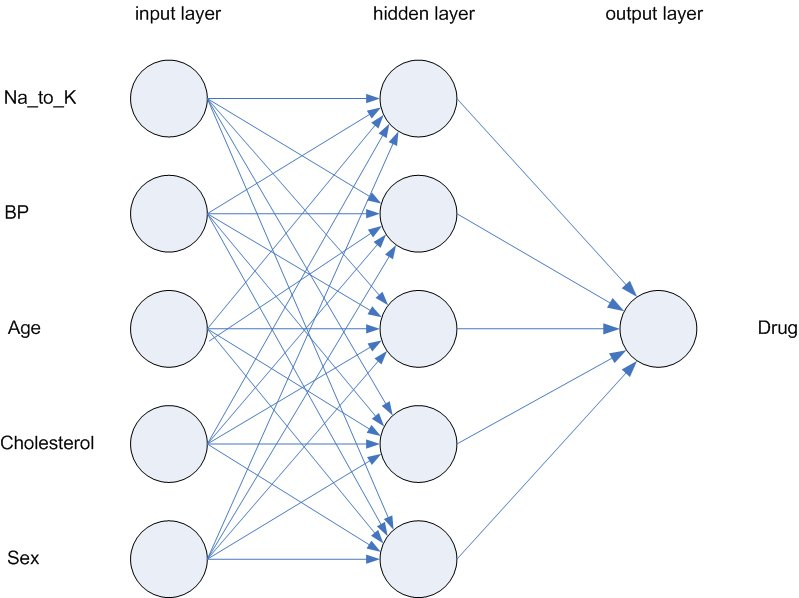

Figura 1. Estructura de una red neuronal
Estructura de una red neuronal
Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. Las unidades se conectan con fuerzas de conexión variables (o ponderaciones). Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

Al principio, todas las ponderaciones son aleatorias y las respuestas que resultan de la red son, posiblemente, disparatadas. La red aprende a través del entrenamiento. Continuamente se presentan a la red ejemplos para los que se conoce el resultado, y las respuestas que proporciona se comparan con los resultados conocidos. La información procedente de esta comparación se pasa hacia atrás a través de la red, cambiando las ponderaciones gradualmente. A medida que progresa el entrenamiento, la red se va haciendo cada vez más precisa en la replicación de resultados conocidos. Una vez entrenada, la red se puede aplicar a casos futuros en los que se desconoce el resultado.

### **Librerías a Utilizar**

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random
import cv2 
import glob #Libreria para importar los data sets. https://docs.python.org/3/library/glob.html

#Librerías de sklearn para Aprendizaje automatico.
from sklearn.model_selection import train_test_split # Para separar los conjuntos de entrenamiento y prueba
from sklearn.metrics import classification_report, confusion_matrix # Matriz de confusión

#Librerías  para creación  de Redes Neuronales.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

### Conexión con Google drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importación de Datos  y visualización 

In [ ]:
# Se importan los datasets
peaton = glob.glob("/content/drive/MyDrive/Navegacion_auto/Modulo 4/Semana 7/pedestrians128x64/*.ppm")
no_peaton = glob.glob("/content/drive/MyDrive/Navegacion_auto/Modulo 4/Semana 7/pedestrian_neg2/*.png")

In [ ]:
print("Cantidad de imagenes de peatones:",len(peaton))

Cantidad de imagenes de peatones: 924


Dimension de las imagen que son peatones: (128, 64, 3)


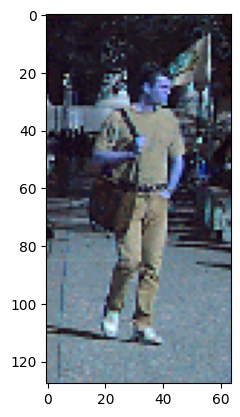

In [ ]:
# Mostrando la imagen de un peaton como ejemplo
img_color = cv2.imread(peaton[random.randint(0, len(peaton))])
plt.imshow(img_color)
print("Dimension de las imagen que son peatones:",img_color.shape)

In [ ]:
print("Cantidad de imagenes de no peatones:",len(no_peaton))

Cantidad de imagenes de no peatones: 934


Dimension de las imagen que no son peatones: (256, 256, 3)


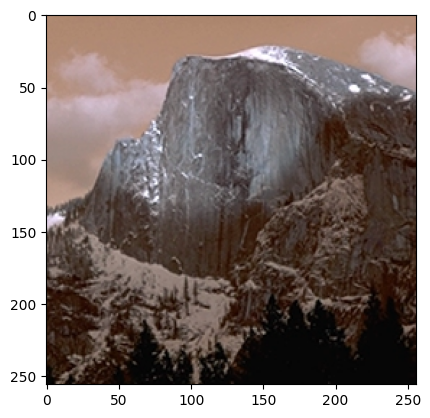

In [ ]:
# Mostrando la imagen de un no peaton como ejemplo
img_color = cv2.imread(no_peaton[random.randint(0, len(no_peaton))])
plt.imshow(img_color)
print("Dimension de las imagen que no son peatones:",img_color.shape)

**Observación:**

Las imágenes de peatones y no peatones tienen diferente tamaño se utilizara un tamaño 64 x 128 para hacer ambos data sets y se convertirán a escala de grises para hacer más fácil el análisis.

### **Combinación de tipos de datos para alimentar el modelo y procesamiento de las imagenes.**

In [ ]:
alto=128
ancho=64

In [ ]:
images = []
y = []

for path in peaton:
    img = cv2.imread(path, 0)
    images.append(img)
    y.append(1)

for path in no_peaton:
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (ancho, alto), interpolation = cv2.INTER_AREA) # Resize necesario para las imagenes de no peatones.
    images.append(img)
    y.append(0)

images = np.array(images,  dtype='float') / 255.0
y = np.array(y)

**Observación:**

Las imágenes no peatones tienen diferente tamaño se realizó un redimensionamiento a un tamaño 64 x 128 ambas sets se convirtieron a escala de grises y se normalizaron para evitar problemas de convergencia.

### **Generación de los datos de entrenamiento y de prueba**

In [ ]:
#Usando train_test_split se generan los sets de entrenamiento y prueba, usando una proporción de 70%-30%
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.3, random_state = 42)
print("Entrenamiento:",X_train.shape)
print("Prueba:",X_test.shape)

Entrenamiento: (1300, 128, 64)
Prueba: (558, 128, 64)


0
1


Text(0, 0.5, 'Número de Muestras')

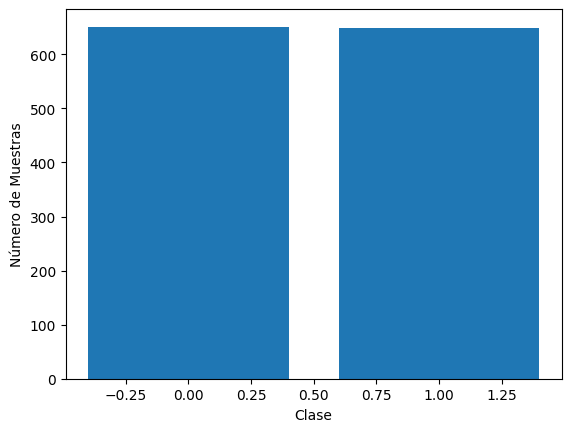

In [ ]:
n_muestras = []
n_clases = 2

for n in range(n_clases):
  print(n)
  x_sel = X_train[y_train == n]
  n_muestras.append(len(x_sel))
plt.figure()
plt.bar(range(0,2), n_muestras)
plt.xlabel("Clase")
plt.ylabel("Número de Muestras")

**Observación:**

Las 2 clases que tiene ese programa están balanceadas, 650 datos de clase 1 y 650 de clase 0.

### **Se unidimensionan las imágenes para adecuarlas como capa de entrada en la red neuronal**

In [ ]:
num_pixels = alto*ancho
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("Datos de Entrenamiento:",X_train.shape)
print("Datos de Prueba:",X_test.shape)
print("Salida de Entrenamiento:",y_train.shape)
print("Salida de Entrenamiento:",y_train.shape)

Datos de Entrenamiento: (1300, 8192)
Datos de Prueba: (558, 8192)
Salida de Entrenamiento: (1300,)
Salida de Entrenamiento: (1300,)


**Observación:**

La entrada de la red neuronal será el número de pixeles de cada imagen en forma de vector para alimentar la red neuronal.


### **Definición del modelo de Red neuronal con capaz ocultas.**##

In [ ]:
model = Sequential()
model.add(Dense(units = 30, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 30)                245790    
                                                                 
 dropout_36 (Dropout)        (None, 30)                0         
                                                                 
 dense_109 (Dense)           (None, 15)                465       
                                                                 
 dense_110 (Dense)           (None, 1)                 16        
                                                                 
Total params: 246,271
Trainable params: 246,271
Non-trainable params: 0
_________________________________________________________________


**Observación:**

Después de varios intentos encontramos y discusiones se decisión hacer una red neuronal profunda con la primer capa de 30 neuronas  una después con 15 y dejar la última con una para clasificar si es peatón o no.
La entrada de la red es el numero de pixeles que 8192

### **Entrenamiento de la Red neuronal con capas ocultas**

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 70, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/70
6/6 [==============================] - 1s 43ms/step - loss: 0.6449 - accuracy: 0.5991 - val_loss: 0.5679 - val_accuracy: 0.7231
Epoch 2/70
6/6 [==============================] - 0s 14ms/step - loss: 0.5899 - accuracy: 0.6573 - val_loss: 0.5126 - val_accuracy: 0.7308
Epoch 3/70
6/6 [==============================] - 0s 12ms/step - loss: 0.5418 - accuracy: 0.7128 - val_loss: 0.4772 - val_accuracy: 0.8154
Epoch 4/70
6/6 [==============================] - 0s 12ms/step - loss: 0.5178 - accuracy: 0.7308 - val_loss: 0.4500 - val_accuracy: 0.8154
Epoch 5/70
6/6 [==============================] - 0s 13ms/step - loss: 0.5043 - accuracy: 0.7410 - val_loss: 0.4369 - val_accuracy: 0.8154
Epoch 6/70
6/6 [==============================] - 0s 11ms/step - loss: 0.4898 - accuracy: 0.7504 - val_loss: 0.4402 - val_accuracy: 0.8308
Epoch 7/70
6/6 [==============================] - 0s 12ms/step - loss: 0.4754 - accuracy: 0.7667 - val_loss: 0.4192 - val_accuracy: 0.8154
Epoch 8/70
6/6 [===========

**Observación:**

Se decidió utilizar un 10% de los datos de entrenamiento para validación con 70 épocas y un batch de 200 para entrenar nuestra red neuronal.

### **Evaluación de la red neuronal.**

**Evaluación con los datos de Prueba**

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

18/18 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9086
Test loss: 0.23144829273223877
Test accuracy: 0.9086021780967712


**Observación:**

Después de varios intentos cuidando no sobreentrenar el modelo o incrementar el loss de la función de perdida se obtuvo 90% ya que si se aumenta este la función de perdida aumentaba o se sobreentrenaba el modelo demasiado. Si bien hay área de oportunidad de mejorarlo para fines demostrativos fue el mejor resultado.

**Grafica de los resultados de la  Funcione de Pérdida “Binary Cross-Entropy”** 

Text(0.5, 0, 'epoch')

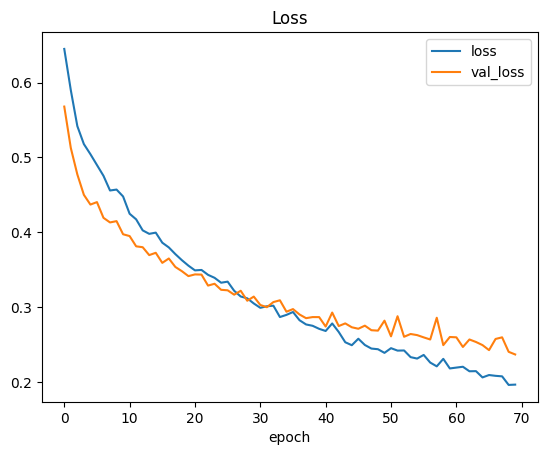

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

**Observación:**

El loss de la función de perdida que se observa en ambos validación y entrenamiento se ve que tienen la misma tendencia aunque ligeramente en validación aumenta y es un área de oportunidad que se debe considerar.

**Grafica de los resultados de la precisión**

Text(0.5, 0, 'epoch')

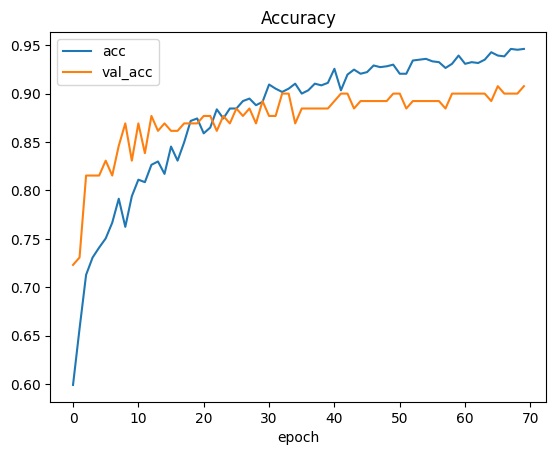

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

**Observación:**

La precisión se trato de cuidar que no se sobre entrena si bien existe un 4 % de diferencia esta se cuido para que no se mas y tampoco el loss de la función de perdida se afecte demasiado.

**Matriz de confusión.**

In [ ]:
y_predict = (model.predict(X_test)> 0.5).astype("int32")

18/18 [==============================] - 0s 3ms/step


<Axes: >

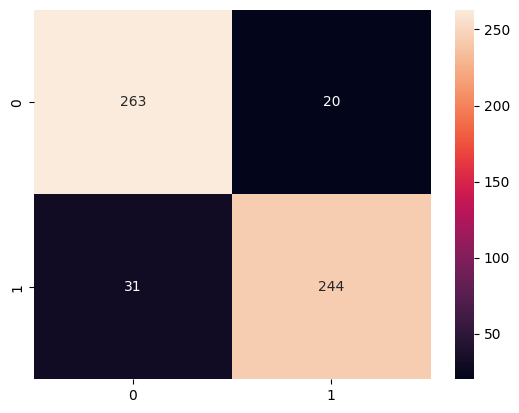

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

**Observación:**

Para la matriz de confusión para la predicción se tomó una condición que todo lo que sea mayor a 0.5 lo considere como 1 la razón es porque la función sigmoid da valores de 0 a 1 intermedios que muestra esa función.

Se observan una cantidad mayor en falsos negativos que de falsos positivos esto puede verse que el modelo es mas sensible a detectar no peatones que peatones. 


### **Pruebas con imágenes  de la web que no fueron usadas durante el entrenamiento, validación o prueba**

#### **Ejemplo 1**

1/1 [==============================] - 0s 18ms/step
predicted class: [[1]]


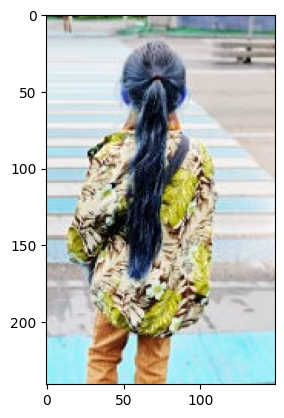

In [ ]:
import cv2    
img=cv2.imread('/content/drive/MyDrive/Navegacion_auto/Modulo 4/Semana 7/Post-Bella-1.jpg')
img_rs = cv2.resize(img, (alto,ancho))
img_gray = cv2.cvtColor(img_rs, cv2.COLOR_BGR2GRAY)
img_not = cv2.bitwise_not(img_gray)
plt.imshow(img)

img_not = img_not/255
img_resh = img_not.reshape(1, alto*ancho)

prediction = (model.predict(img_resh)> 0.5).astype("int32")
print("predicted class:", str(prediction))


####**Ejemplo 2**

1/1 [==============================] - 0s 119ms/step
predicted class: [[0]]


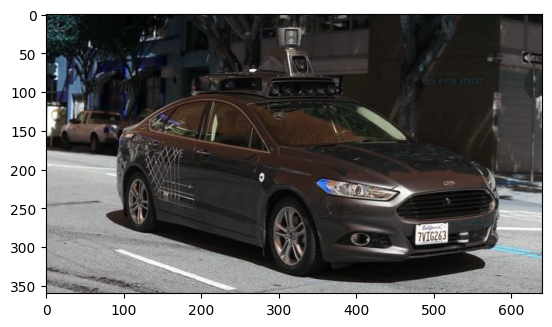

In [ ]:
import cv2    
img=cv2.imread('/content/drive/MyDrive/Navegacion_auto/Modulo 4/Semana 7/Carro2.jpg')
img_rs = cv2.resize(img, (alto,ancho))
img_gray = cv2.cvtColor(img_rs, cv2.COLOR_BGR2GRAY)
img_not = cv2.bitwise_not(img_gray)
plt.imshow(img)

img_not = img_not/255
img_resh = img_not.reshape(1, alto*ancho)

prediction = (model.predict(img_resh)> 0.5).astype("int32")
print("predicted class:", str(prediction))

**Observación:**

Se realizaron dos pruebas con imágenes de internet, en el caso de los peatones como se usaron imágenes recortadas donde aparezca un peatón se tomo una similar pero que no se observara y resultado fue bueno detecto que es un peatón.

Posteriormente en el ejemplo 2 se uso la de un vehículo donde el modelo rechazo que eso fuera un peatón. 


### **Conclusiones:**

Como se observo el uso de Deep learning es una herramienta buena para realizar la clasificación de objetos en imágenes que no sea necesario una extracción de objetos previamente como con el ejercicio anterior que ocupamos HOG. Mostro un % de precisión de 90% con los datos de prueba que la red neuronal nunca vio hasta su evaluación.
Existen algunas desventajas observadas durante la practica como evitar que el modelo se sobreentrene con mas iteraciones o la función de costo aumente demasiado en la validación a medida que la red es más profunda (más capas ocultas).

Un parámetro que sirvió mucho y permitió tener estos resultados fue utilizar un learning rate pequeño, esto hizo que el modelo aprendiera y mantuviera valores arriba de 80% de precisión e en entrenamiento y no incrementara mucho la función de perdida loss.

Para trabajos futuros sería bueno compáralo usando un modelo de red neuronal convolucional para observar si se tienen mejores resultados y no se encuentran los problemas de sobre entrenamiento o la función de perdida crezca mucho en la validación.


### **Referencias:**

- IBM. (2021). El modelo de redes neuronales. https://www.ibm.com/docs/es/spss-modeler/saas?topic=networks-neural-model

- Venturi, L. y Korda, K. (2020). Hands-On Vision and Behavior For Self-Driving Cars. Packt Publishing

- Ranjan, S. y Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd.